<div style="border-radius: 10px; border: #DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size: 100%; text-align: left">
    <h3 align="left"><font color='#3498DB'> 変分推論 </font></h3>
    
    コードは以下より引用しました。
    
    Chris Fonnesbeck , Maxim Kochurov . "Introduction to Variational Inference with PyMC". In: PyMC Examples. Ed. by PyMC Team. DOI: 10.5281/zenodo.5654871
    
    ライセンス情報
    All the notebooks in this example gallery are provided under the MIT License which allows modification, and redistribution for any use provided the copyright and license notices are preserved.

In [1]:
!pip install pymc

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.4/472.4 kB 9.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 35.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.8 MB/s eta 0:00:00
  Created wheel for cons: filename=cons-0.4.6-py3-none-any.whl size=9097 sha256=feebe888311ad56f2b33b54d93947c4f5dc209e21d4680688c20b7d1bff183ef
  Stored in directory: /root/.cache/pip/wheels/a4/11/f5/8265470e17d280d8b5910e1b0f298521420a5086d696e96799
  Created wheel for logical-unification: filename=logical_unification-0.4.6-py3-none-any.whl size=13912 sha256=c5665289b6c85eed8daf3167b07abb85ee4981e6d752b3e82c46d7af225c19bd
  Stored in directory: /root/.cache/pip/wheels/ba/95/1f/29d557452d7f5102769deb2bdc

In [2]:
%matplotlib inline
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import pytensor
import seaborn as sns

np.random.seed(42)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


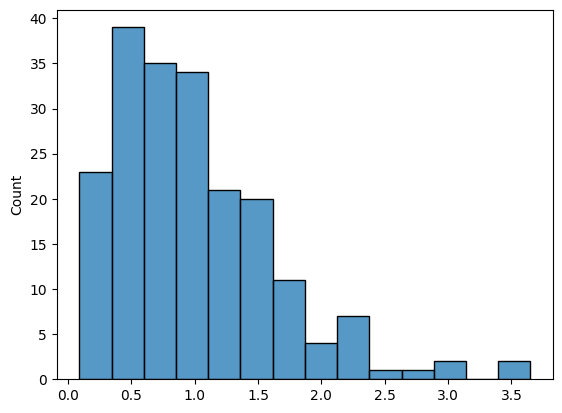

In [3]:
gamma_data = np.random.gamma(2, 0.5, size=200)
sns.histplot(gamma_data);

In [4]:
with pm.Model() as gamma_model:
    alpha = pm.Exponential("alpha", 0.1)
    beta = pm.Exponential("beta", 0.1)
    
    y = pm.Gamma("y", alpha, beta, observed=gamma_data)

In [5]:
with gamma_model:
    mean_field = pm.fit(obj_optimizer=pm.adagrad_window(learning_rate=1e-2))

In [6]:
with gamma_model:
    trace = pm.sample()

In [7]:
mean_field

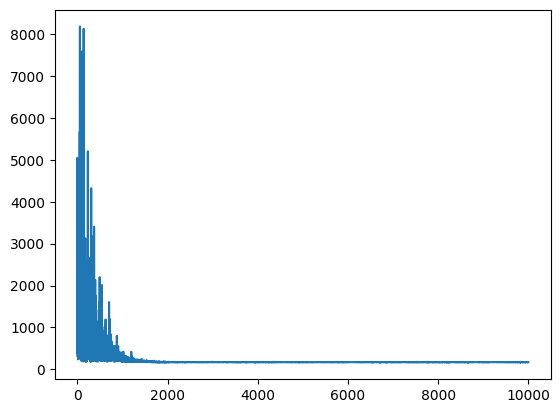

In [8]:
plt.plot(mean_field.hist)

In [9]:
approx_sample = mean_field.sample(1000)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


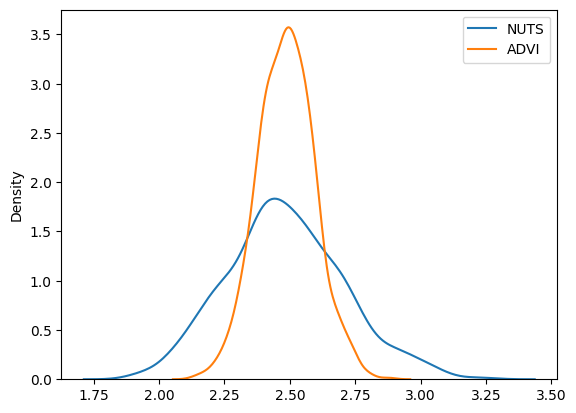

In [10]:
sns.kdeplot(trace.posterior["alpha"].values.flatten(), label="NUTS")
sns.kdeplot(approx_sample.posterior["alpha"].values.flatten(), label="ADVI")
plt.legend();

In [11]:
w = np.array([0.2, 0.8])
mu = np.array([-0.3, 0.5])
sd = np.array([0.1, 0.1])

with pm.Model() as model:
    x = pm.NormalMixture("x", w=w, mu=mu, sigma=sd)
    x2 = x**2
    sin_x = pm.math.sin(x)

In [12]:
with model:
    pm.Deterministic("x2", x2)
    pm.Deterministic("sin_x", sin_x)

In [13]:
with model:
    trace = pm.sample(5000)

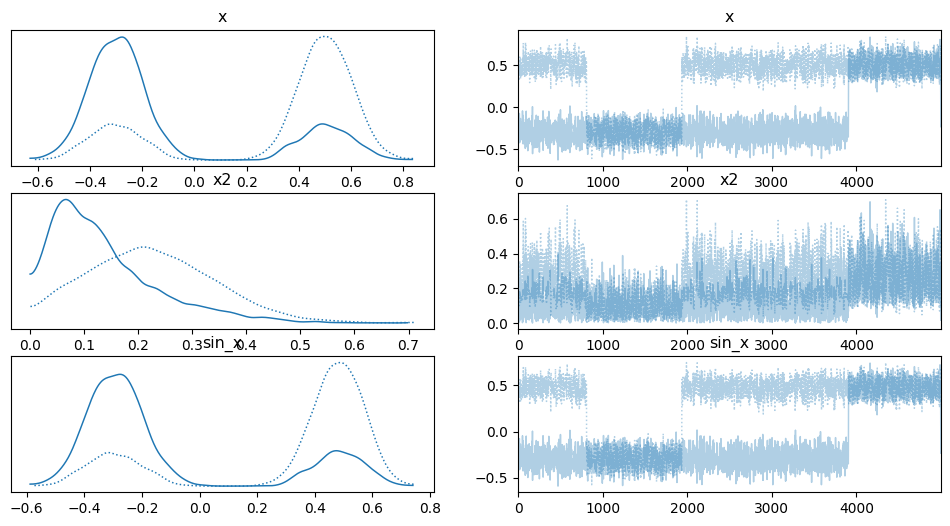

In [15]:
az.plot_trace(trace);